In [44]:
# Task 3: Customer Segmentation

In [46]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Load the datasets
customers = pd.read_csv(r"C:\eCommerce\Customers.csv")
transactions = pd.read_csv(r"C:\eCommerce\Transactions.csv")

In [50]:
# Load the datasets by given drive link
customers_url = "https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"
transactions_url = "https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"


In [52]:
customers = pd.read_csv(customers_url)
transactions = pd.read_csv(transactions_url)

In [54]:
# Data preprocessing
# Aggregate transaction data by CustomerID
customer_transactions = transactions.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    total_quantity=('Quantity', 'sum'),
    total_transactions=('TransactionID', 'count')
).reset_index()

In [56]:
# Merge with customer profiles
customer_profiles = pd.merge(customers, customer_transactions, on='CustomerID', how='left')
customer_profiles.fillna(0, inplace=True)

In [58]:
# Select features for clustering
features = ['total_spent', 'total_quantity', 'total_transactions']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_profiles[features])

In [60]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

C:\Users\abhas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\abhas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\abhas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\abhas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

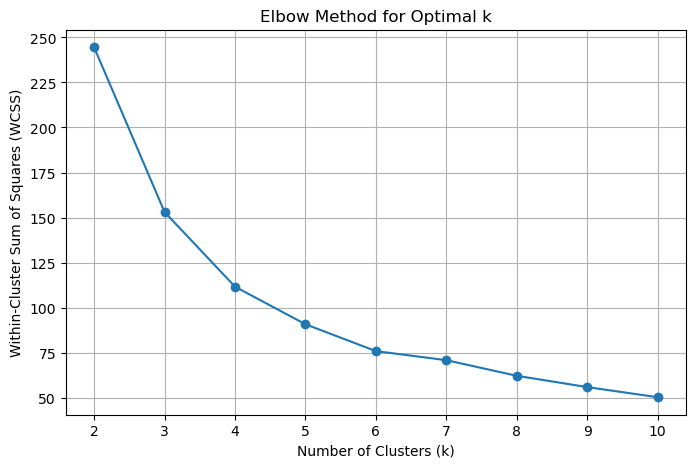

In [62]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [64]:
# Fit the KMeans model with an optimal number of clusters (e.g., 4 based on the Elbow Curve)
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(scaled_features)
customer_profiles['Cluster'] = kmeans.labels_

C:\Users\abhas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [66]:
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 0.8052437830269734


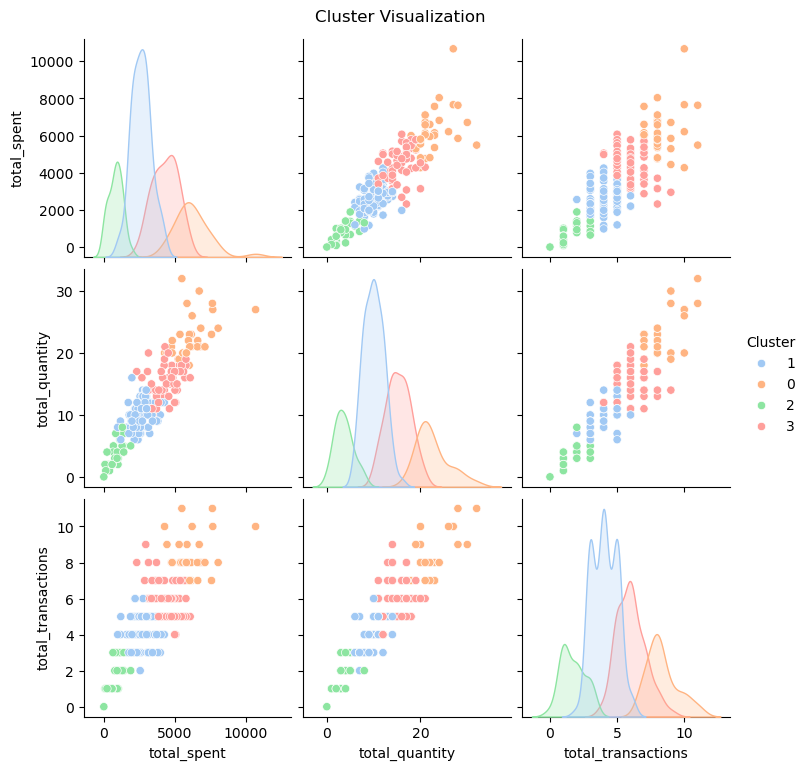

In [68]:
# Visualize the clusters using a pairplot
customer_profiles['Cluster'] = customer_profiles['Cluster'].astype(str)  # Convert cluster labels to strings for plotting
sns.pairplot(customer_profiles, hue='Cluster', vars=features, palette='pastel')
plt.suptitle("Cluster Visualization", y=1.02)
plt.show()

In [70]:
# Save clustering results to a CSV file
customer_profiles[['CustomerID', 'Cluster']].to_csv('Customer_Segmentation.csv', index=False)

In [72]:
# Display clustering summary
cluster_summary = customer_profiles.groupby('Cluster')[features].mean()
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
         total_spent  total_quantity  total_transactions
Cluster                                                 
0        6210.658485       22.545455            8.333333
1        2620.240361        9.975904            4.048193
2         816.316296        3.592593            1.703704
3        4307.427018       15.228070            6.017544


In [74]:
# Save clustering summary to CSV (optional)
cluster_summary.to_csv('Cluster_Summary.csv')